In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CSV_Files/players.csv')
df.head(5)

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
0,1630173,Precious,Achiuwa,Forward,6-8,225,1999-09-19,Nigeria,Memphis,2020,1.0,20.0
1,203500,Steven,Adams,Center,6-11,265,1993-07-20,New Zealand,Pittsburgh,2013,1.0,12.0
2,1628389,Bam,Adebayo,Center-Forward,6-9,255,1997-07-18,USA,Kentucky,2017,1.0,14.0
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
4,1630583,Santi,Aldama,Forward-Center,7-0,215,2001-01-10,Spain,Loyola-Maryland,2021,1.0,30.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerid      548 non-null    int64  
 1   fname         548 non-null    object 
 2   lname         548 non-null    object 
 3   position      548 non-null    object 
 4   height        548 non-null    object 
 5   weight        548 non-null    int64  
 6   birthday      548 non-null    object 
 7   country       548 non-null    object 
 8   school        538 non-null    object 
 9   draft_year    548 non-null    int64  
 10  draft_round   409 non-null    float64
 11  draft_number  408 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 51.5+ KB


In [ ]:
df[df['draft_round']== 1]['fname']

,fname
0,Precious
1,Steven
2,Bam
3,Ochai
4,Santi
...,...
538,James
540,Delon
543,Thaddeus
544,Trae


In [ ]:
df[df['draft_round']== 2]['fname']

,fname
11,Kostas
12,Thanasis
27,Dalano
32,Will
33,Charles
...,...
519,Joe
520,Aaron
527,Jaylin
534,Vince


In [ ]:
df[df['draft_year']==2022]["fname"].nunique()

78

In [ ]:
df['school'].nunique()

176

In [ ]:
df[df['school']== 'Princeton HS (OH)']['playerid']

,playerid
36,1629647


In [ ]:
df[df['playerid'] == 1629647]['lname']

,lname
36,Bazley


In [ ]:
df['school'].unique()

array(['Memphis', 'Pittsburgh', 'Kentucky', 'Kansas', 'Loyola-Maryland',
       'Virginia Tech', 'Duke', 'Texas', 'Georgia Tech', 'UCLA',
       'Filathlitikos', 'University of Dayton', 'Panathinaikos',
       'North Carolina', 'Indiana', 'Villanova',
       'University of Texas at Austin', 'Maccabi Tel Aviv', 'Arizona',
       'FC Barcelona', 'Wisconsin-Milwaukee', 'Illawarra', 'TCU',
       'Nebraska', nan, 'Florida State', 'Western Kentucky', 'Ohio State',
       'Le Mans', 'Princeton HS (OH)', 'Florida', 'NBA G League Ignite',
       'Baskonia', 'Arkansas', 'UNLV', 'Mega Basket',
       'Baloncesto Fuenlabrada', 'Syracuse', 'Fenerbahce', 'Oregon',
       'Connecticut', 'San Francisco', 'College of Charleston',
       'Virginia', 'Miami', 'California', 'Baylor', 'Southern Methodist',
       'Colorado', 'Iowa State', 'Marquette', 'Oakland', 'Georgia',
       'San Pablo Burgos', 'Elan Chalon', 'West Virginia', 'Texas A&M',
       "St. John's", 'Tennessee', 'Michigan State', 'Arizona S

In [ ]:
df[df['school']=='Duke']['country']

,country
6,USA
21,USA
25,USA
31,Canada
84,USA
86,USA
110,USA
186,USA
234,USA
235,Australia


In [ ]:
df_schools_USA = df[(df['country'] == 'USA') & (df['draft_year'] >= 2020)]

In [ ]:
df_schools_USA.head(5)

,playerid,fname,lname,position,height,weight,birthday,country,school,draft_year,draft_round,draft_number
3,1630534,Ochai,Agbaji,Guard,6-5,215,2000-04-20,USA,Kansas,2022,1.0,14.0
8,1630631,Jose,Alvarado,Guard,6-0,179,1998-04-12,USA,Georgia Tech,2021,NaN,NaN
13,1630175,Cole,Anthony,Guard,6-3,185,2000-05-15,USA,North Carolina,2020,1.0,15.0
22,1631116,Patrick,Baldwin,Forward,6-9,220,2002-11-18,USA,Wisconsin-Milwaukee,2022,1.0,28.0
23,1630163,LaMelo,Ball,Guard,6-7,180,2001-08-22,USA,Illawarra,2020,1.0,3.0


<Axes: xlabel='school', ylabel='draft_round'>

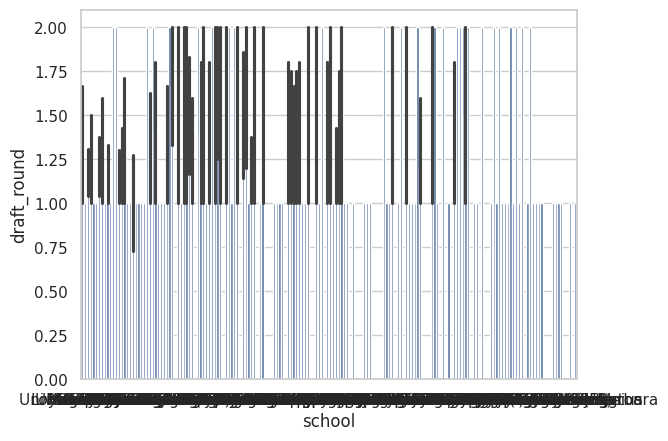

In [ ]:
sb.barplot(x ='school', y ='draft_round', data = df)

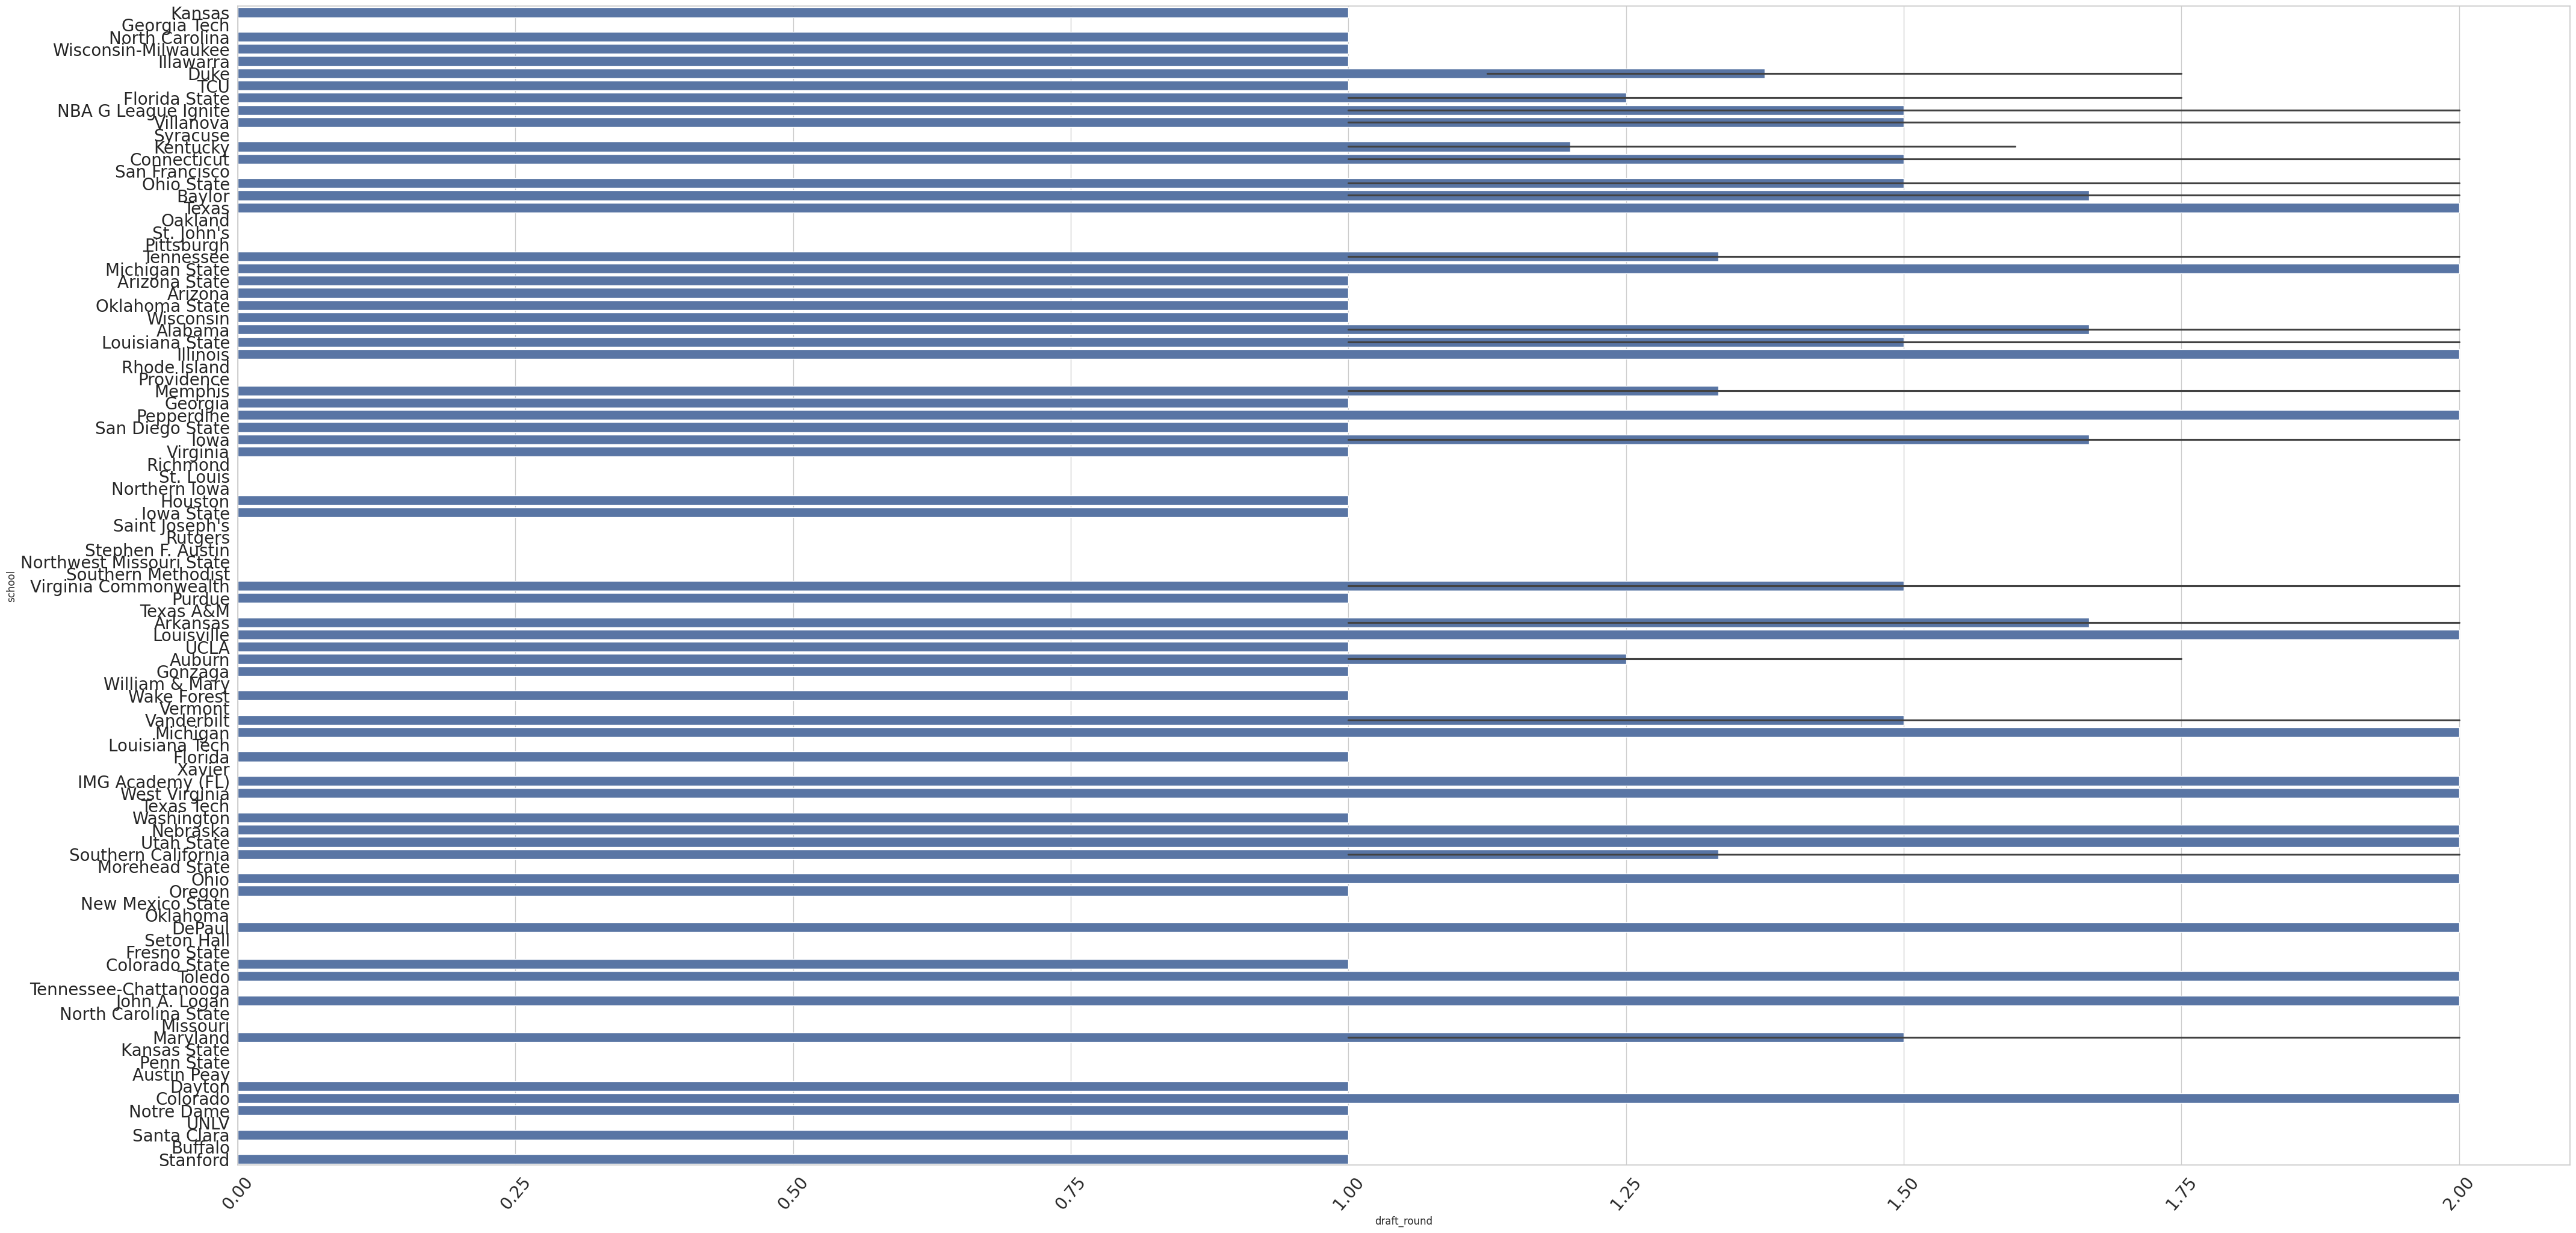

In [ ]:
plt.figure(figsize=(50,25))
sb.barplot(x = 'draft_round', y = 'school', data = df_schools_USA)
plt.xticks(rotation=50, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

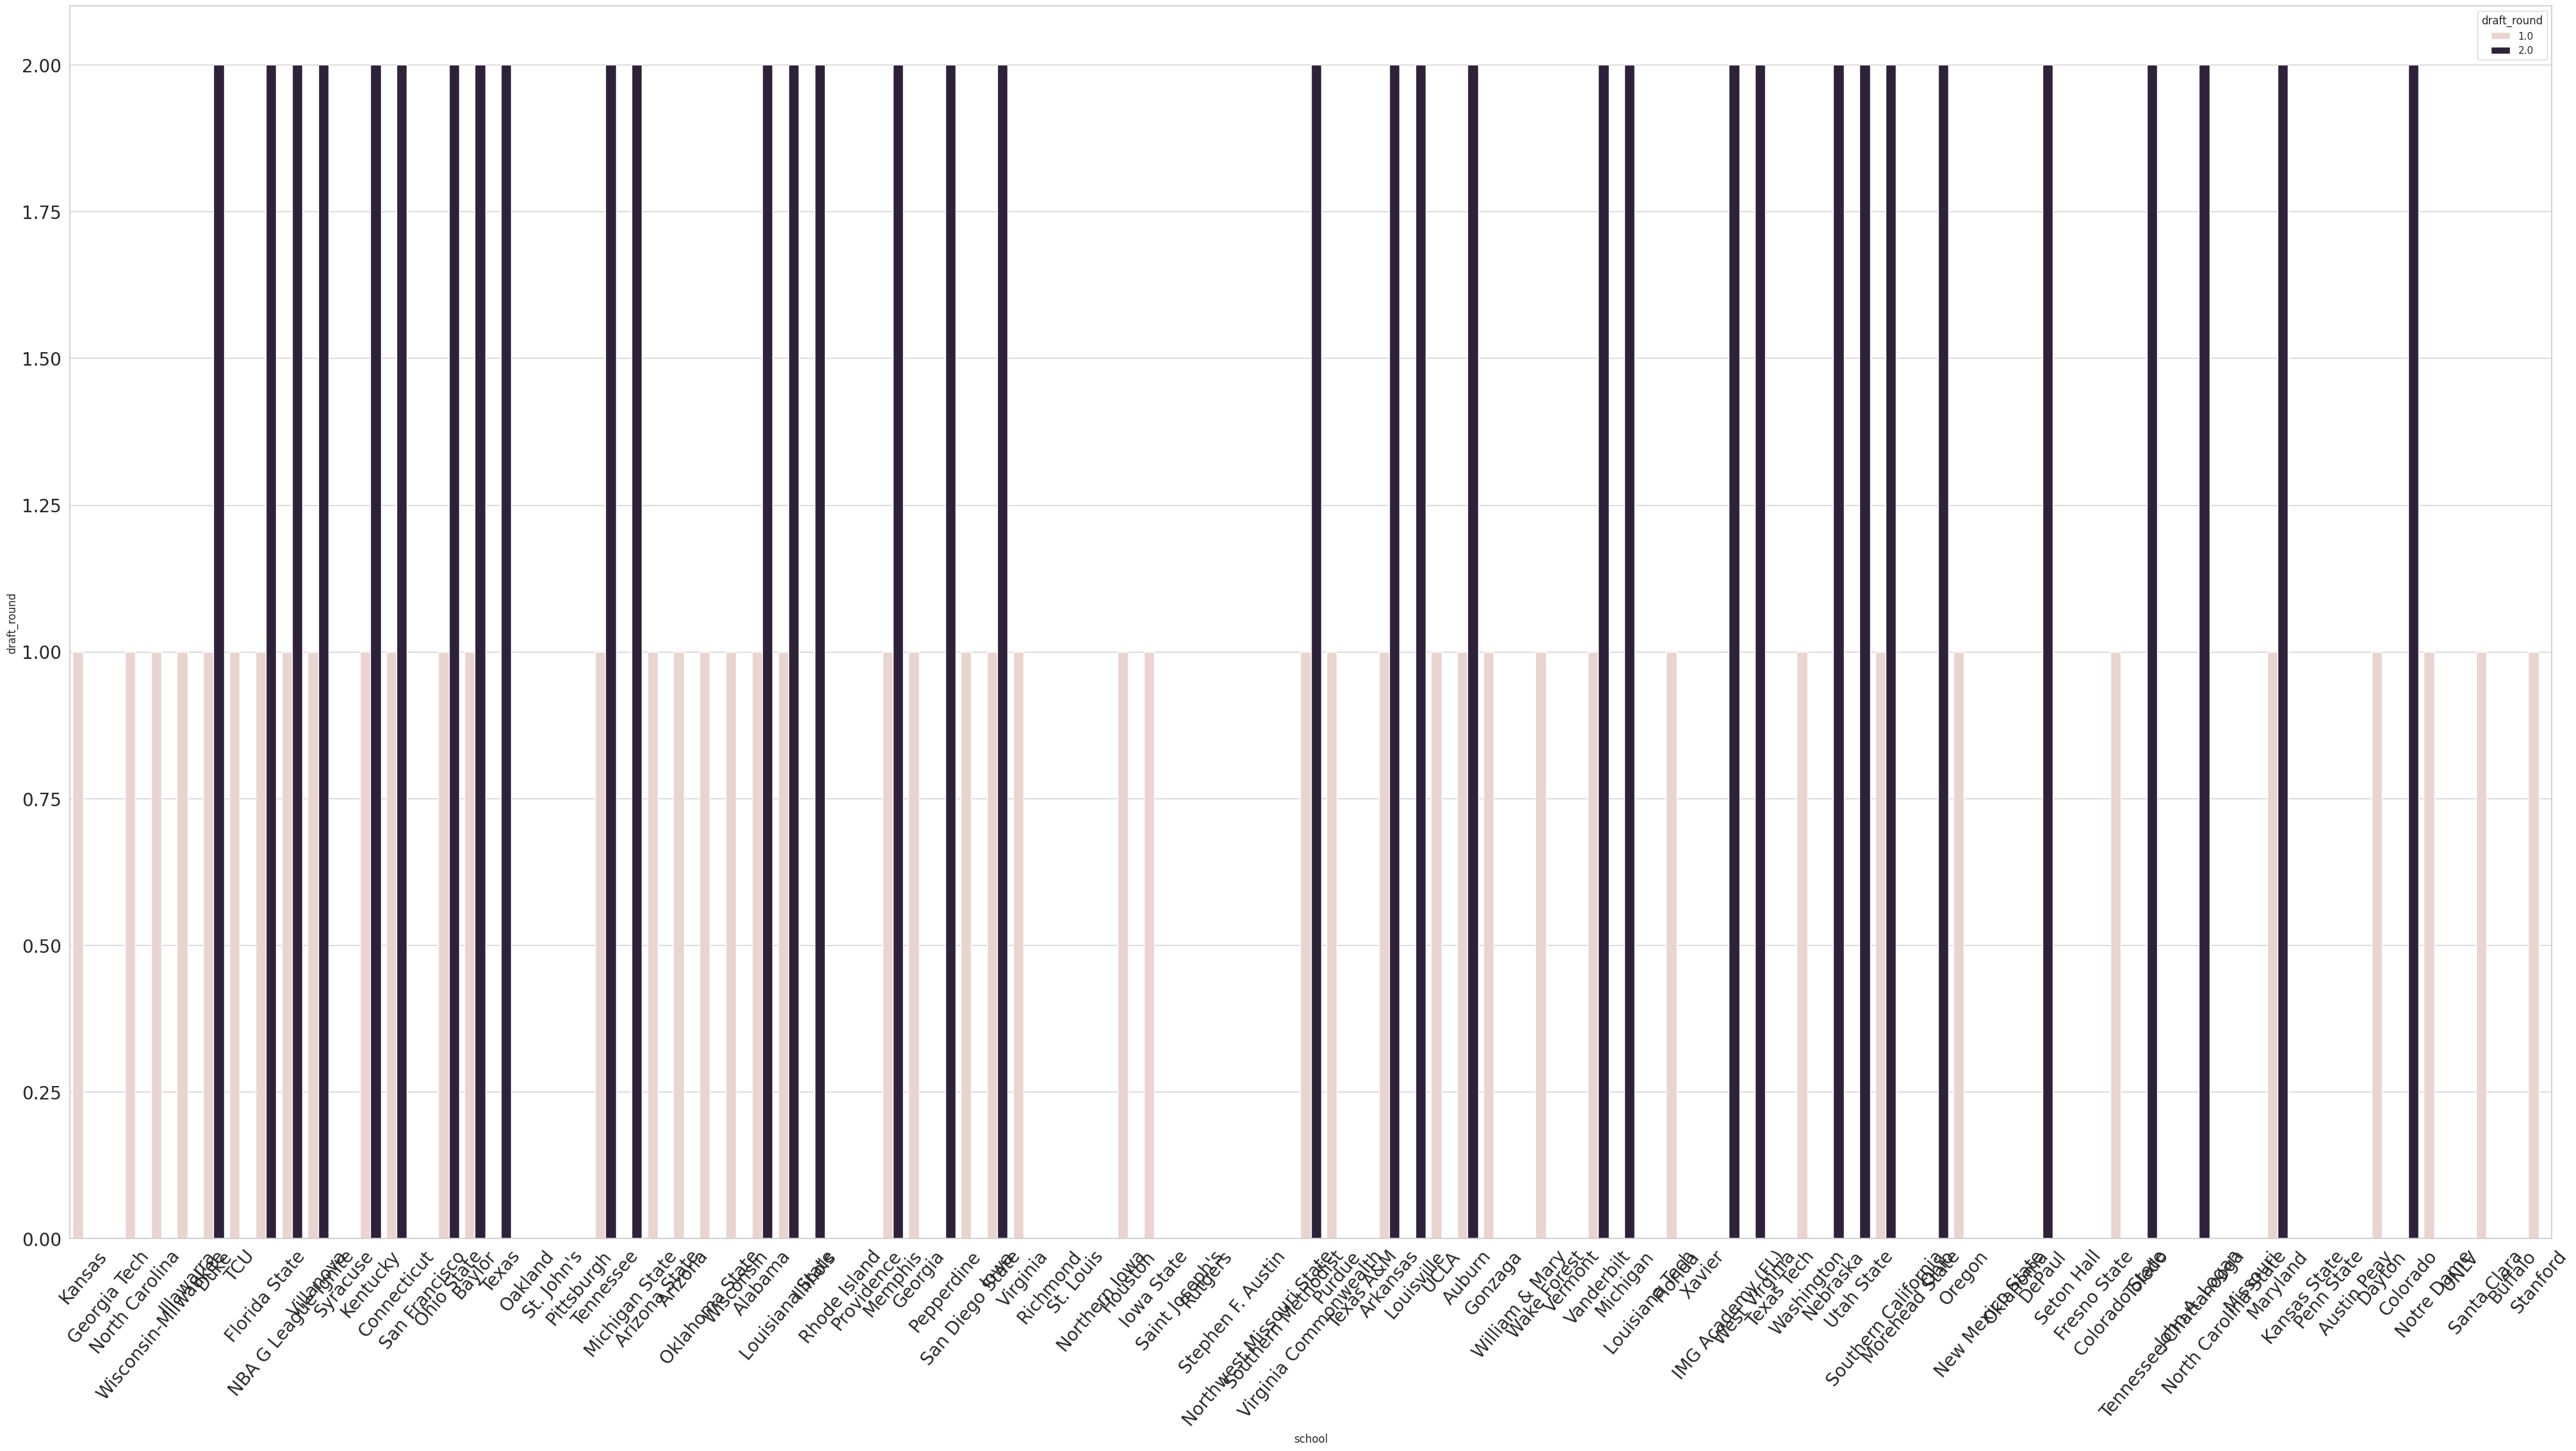

In [ ]:
plt.figure(figsize=(50,25))
sb.barplot(x = 'school', y = 'draft_round', hue = 'draft_round', data = df_schools_USA)
plt.xticks(rotation=50, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show

In [ ]:
#Making a subset
newdf = df[['school', 'playerid','fname','lname','weight','draft_year','country','draft_round','position','height']]
newdf

,school,playerid,fname,lname,weight,draft_year,country,draft_round,position,height
0,Memphis,1630173,Precious,Achiuwa,225,2020,Nigeria,1.0,Forward,6-8
1,Pittsburgh,203500,Steven,Adams,265,2013,New Zealand,1.0,Center,6-11
2,Kentucky,1628389,Bam,Adebayo,255,2017,USA,1.0,Center-Forward,6-9
3,Kansas,1630534,Ochai,Agbaji,215,2022,USA,1.0,Guard,6-5
4,Loyola-Maryland,1630583,Santi,Aldama,215,2021,Spain,1.0,Forward-Center,7-0
...,...,...,...,...,...,...,...,...,...,...
543,Georgia Tech,201152,Thaddeus,Young,235,2007,USA,1.0,Forward,6-8
544,Oklahoma,1629027,Trae,Young,164,2018,USA,1.0,Guard,6-1
545,Georgetown,1630209,Omer,Yurtseven,275,2020,Turkey,NaN,Center,6-11
546,Indiana,203469,Cody,Zeller,240,2013,USA,1.0,Forward-Center,6-11


In [ ]:
# Here I am making a subset that will only include information starting from the year 2019 and going up.
# I chose to do it on the most recent years for familiarity on the players
# and aslo taking covid into account
#new_df = newdf[(newdf['country'] == 'USA') & (newdf['draft_year'] >= 2013)]
new_df = newdf[(newdf['draft_year'] >= 2013)]

In [ ]:
new_df.isnull().sum()

,0
school,9
playerid,0
fname,0
lname,0
weight,0
draft_year,0
country,0
draft_round,134
position,0
height,0


In [ ]:
new_df.dropna(subset=['school','draft_round','draft_year'], inplace=True)

<ipython-input-61-8e9999d11298>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset=['school','draft_round','draft_year'], inplace=True)


In [ ]:
new_df.isnull().sum()

,0
school,0
playerid,0
fname,0
lname,0
weight,0
draft_year,0
country,0
draft_round,0
position,0
height,0


In [ ]:
df_regions = pd.read_csv('/content/gdrive/MyDrive/CSV_Files/player_regions.csv')

In [ ]:
df_regions.head(20)

,Region_Continent,school
0,SountEast,Duke
1,SouthEast,Memphis
2,NorthEast,Pittsburgh
3,SouthEast,Kentucky
4,MidWest,Kansas
5,NorthEast,Loyola-Maryland
6,SouthEast,Virginia Tech
7,SouthWest,Texas
8,SouthEast,Georgia Tech
9,SouthWest,UCLA


In [ ]:
merged_df = pd.merge(new_df, df_regions, on='school', how='right', suffixes=('_left','_right'))
merged_df.head(5)

,school,playerid,fname,lname,weight,draft_year,country,draft_round,position,height,Region_Continent
0,Duke,1628960.0,Grayson,Allen,198.0,2018.0,USA,1.0,Guard,6-4,SountEast
1,Duke,1628963.0,Marvin,Bagley III,235.0,2018.0,USA,1.0,Forward,6-10,SountEast
2,Duke,1631094.0,Paolo,Banchero,250.0,2022.0,USA,1.0,Forward,6-10,SountEast
3,Duke,1629628.0,RJ,Barrett,214.0,2019.0,Canada,1.0,Forward-Guard,6-6,SountEast
4,Duke,1630176.0,Vernon,Carey Jr.,270.0,2020.0,USA,2.0,Center,6-10,SountEast


In [ ]:
merged_df.isnull().sum()
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isnull().sum()

,0
school,0
playerid,0
fname,0
lname,0
weight,0
draft_year,0
country,0
draft_round,0
position,0
height,0


In [ ]:
merged_df.to_excel("merged_df.xlsx", index=False)  # Save the DataFrame to an Excel file

In [ ]:
from google.colab import files

# Download the Excel file
files.download("merged_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=['draft_round', 'position', 'height'], drop_first=True)

In [ ]:
merged_df.head(20)

,school,playerid,fname,lname,weight,draft_year,country,Region_Continent,draft_round_1.0,draft_round_2.0,...,height_6-3,height_6-4,height_6-5,height_6-6,height_6-7,height_6-8,height_6-9,height_7-0,height_7-1,height_7-2
0,Duke,1628960.0,Grayson,Allen,198.0,2018.0,USA,SountEast,True,False,...,False,True,False,False,False,False,False,False,False,False
1,Duke,1628963.0,Marvin,Bagley III,235.0,2018.0,USA,SountEast,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Duke,1631094.0,Paolo,Banchero,250.0,2022.0,USA,SountEast,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Duke,1629628.0,RJ,Barrett,214.0,2019.0,Canada,SountEast,True,False,...,False,False,False,True,False,False,False,False,False,False
4,Duke,1630176.0,Vernon,Carey Jr.,270.0,2020.0,USA,SountEast,False,True,...,False,False,False,False,False,False,False,False,False,False
5,Duke,1628976.0,Wendell,Carter Jr.,270.0,2018.0,USA,SountEast,True,False,...,False,False,False,False,False,False,False,False,False,False
6,Duke,1631100.0,AJ,Griffin,220.0,2022.0,USA,SountEast,True,False,...,False,False,False,True,False,False,False,False,False,False
7,Duke,1627742.0,Brandon,Ingram,190.0,2016.0,USA,SountEast,True,False,...,False,False,False,False,False,True,False,False,False,False
8,Duke,1628402.0,Frank,Jackson,205.0,2017.0,USA,SountEast,False,True,...,True,False,False,False,False,False,False,False,False,False
9,Duke,1630552.0,Jalen,Johnson,219.0,2021.0,USA,SountEast,True,False,...,False,False,False,False,False,True,False,False,False,False


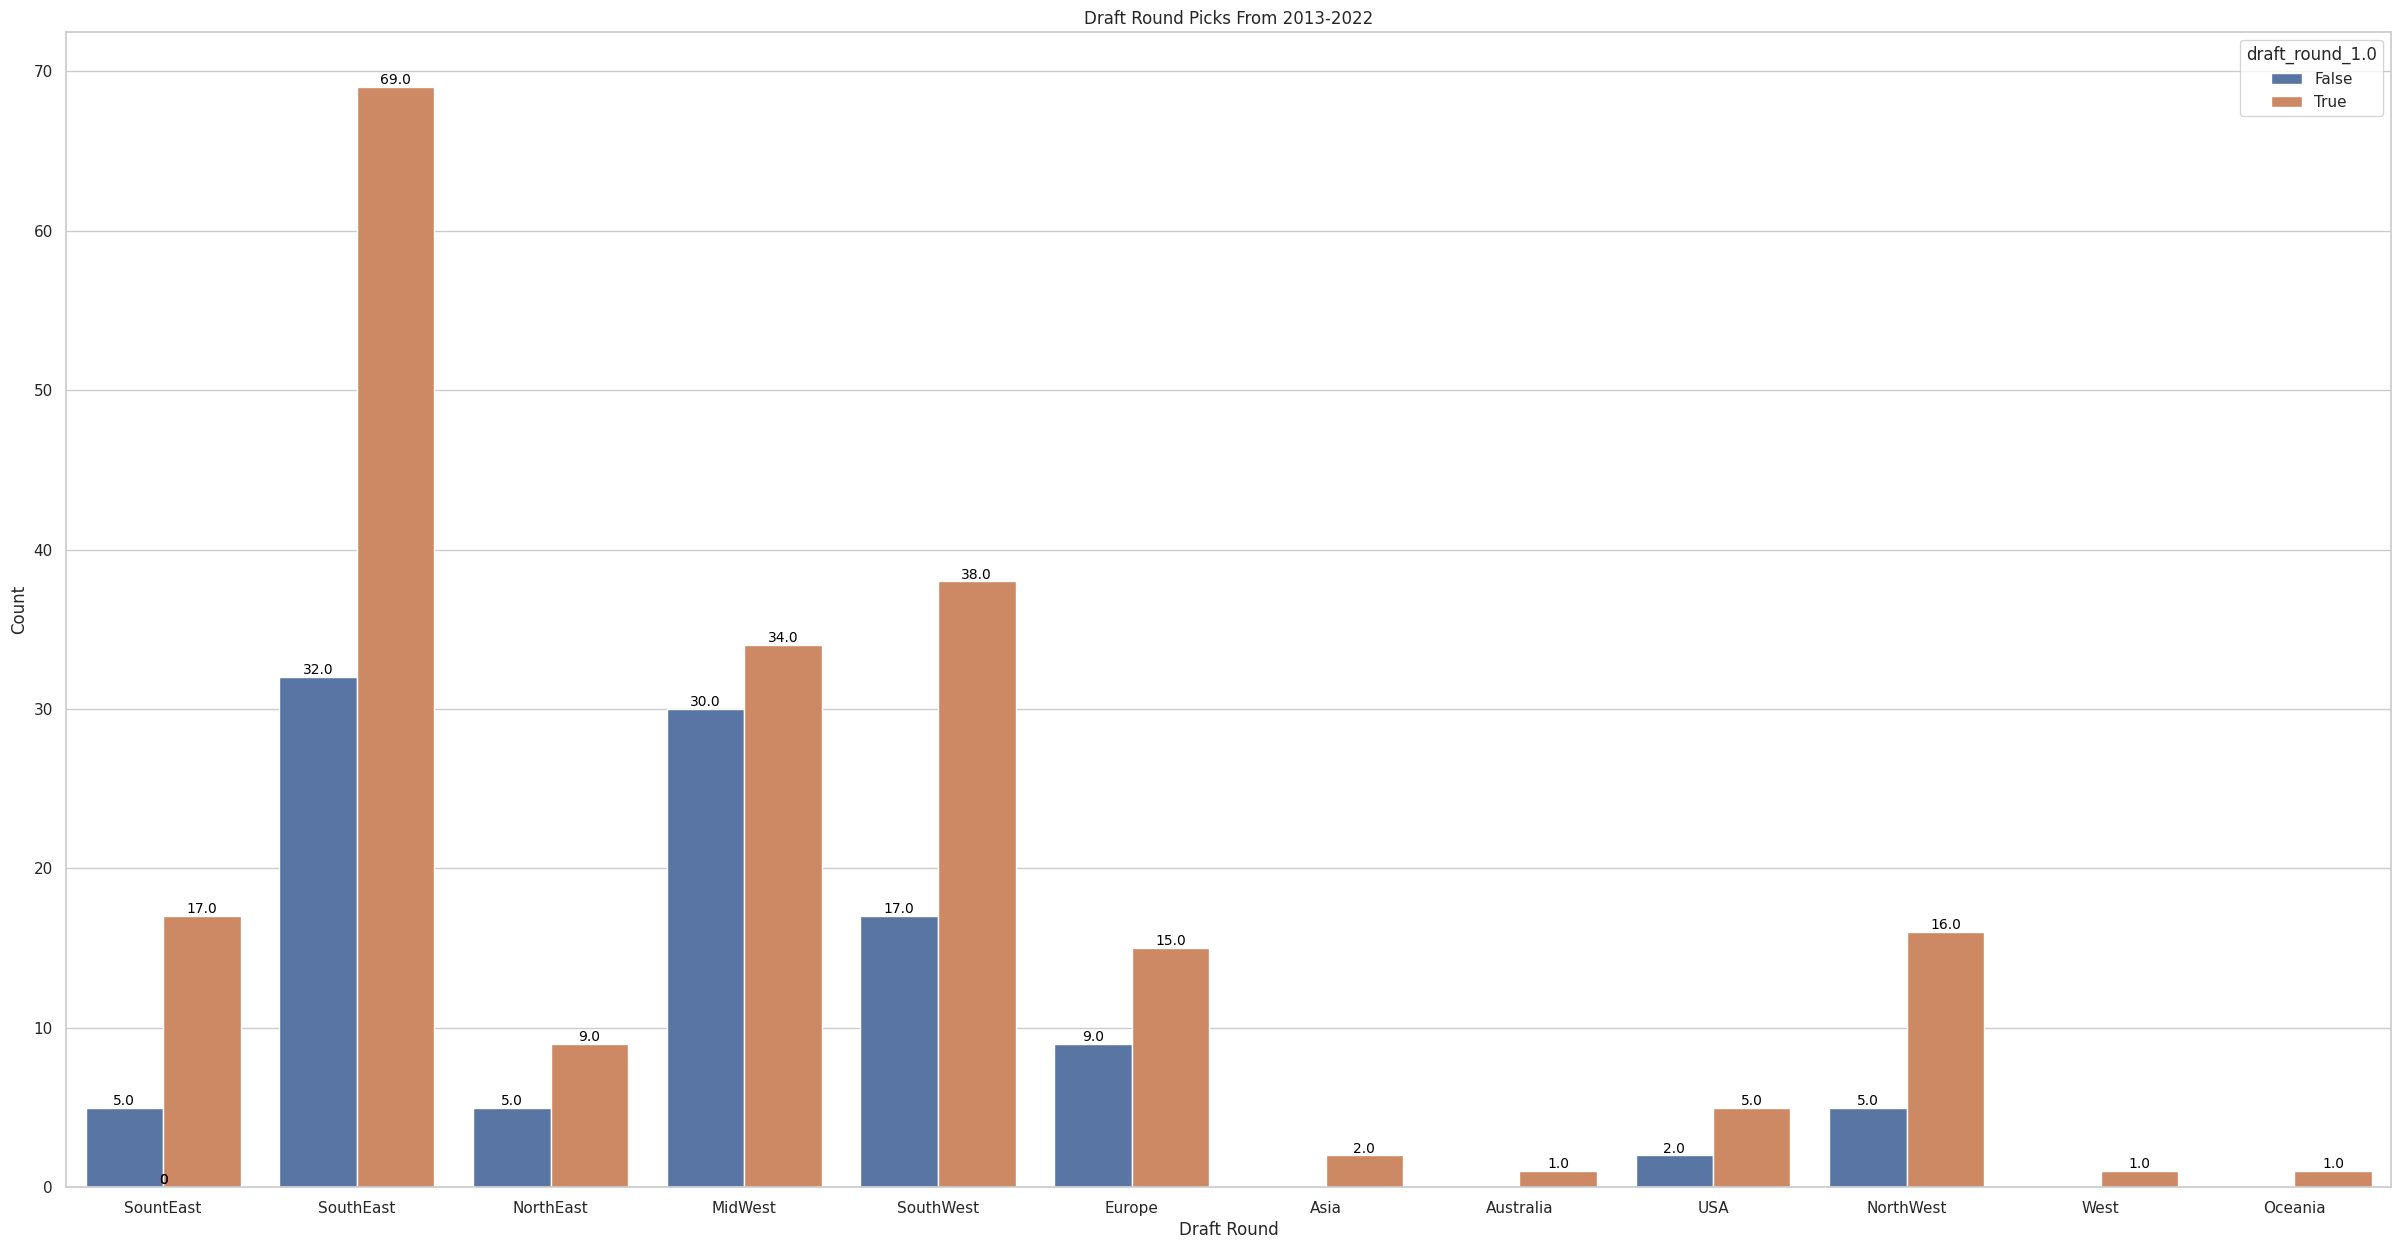

In [ ]:
sb.set(style="whitegrid")

# Plotting the count of one-hot encoded 'draft_round' values
plt.figure(figsize=(30, 15))
plt.title('Draft Round Picks From 2013-2022')
plt.xlabel('Draft Round')
plt.ylabel('Count')

ax = sb.countplot(data=merged_df, x='Region_Continent', hue='draft_round_1.0')

# Display count values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
merged_df.isnull().sum()
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isnull().sum()

,0
school,0
playerid,0
fname,0
lname,0
weight,0
draft_year,0
country,0
Region_Continent,0
draft_round_1.0,0
draft_round_2.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
trainX, testX, trainY, testY = train_test_split(merged_df[[ 'position_Center-Forward', 'position_Forward', 'position_Forward-Center','position_Forward-Guard', 'position_Guard','position_Guard-Forward', 'weight','height_6-2','height_6-3','height_6-4','height_6-5','height_6-6','height_6-7','height_6-8','height_6-9','height_7-0']], merged_df['draft_round_1.0'], test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Instantiate the classifier
kn = KNeighborsClassifier()

# Train the classifier
kn.fit(trainX, trainY)

# Make predictions on the test set
kn_pred = kn.predict(testX)

accuracy_kn = accuracy_score(testY, kn_pred)

# Report the evaluation metric
print("\nKNearestNeighbor Performance Metric:")
print("Accuracy Score:", accuracy_kn)


KNearestNeighbor Performance Metric:
Accuracy Score: 0.5822784810126582


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Instantiate the classifier
lg = LogisticRegression()

# Train the classifier
lg.fit(trainX, trainY)

# Make predictions on the test set
lg_pred = lg.predict(testX)

accuracy_lg = accuracy_score(testY, lg_pred)

# Report the evaluation metric
print("\nLogistic Regression Performance Metric:")
print("Accuracy Score:", accuracy_lg)


Logistic Regression Performance Metric:
Accuracy Score: 0.6455696202531646


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Instantiate the classifier
svc = SVC()

# Train the classifier
svc.fit(trainX, trainY)

# Make predictions on the test set
svc_pred = svc.predict(testX)

accuracy_svc = accuracy_score(testY, svc_pred)

# Report the evaluation metric
print("Support Vector Classifier Performance Metric:")
print("Accuracy Score:", accuracy_svc)

Support Vector Classifier Performance Metric:
Accuracy Score: 0.6455696202531646


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Instantiate the classifier
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(trainX, trainY)

# Make predictions on the test set
dt_pred = dt.predict(testX)

accuracy_dt = accuracy_score(testY, dt_pred)

# Report the evaluation metric
print("Decision Classifier Performance Metric:")
print("Accuracy Score:", accuracy_dt)

Decision Classifier Performance Metric:
Accuracy Score: 0.5822784810126582


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Instantiate the classifier
rf = RandomForestClassifier()

# Train the classifier
rf.fit(trainX, trainY)

# Make predictions on the test set
rf_pred = rf.predict(testX)

accuracy_rf = accuracy_score(testY, rf_pred)

# Report the evaluation metric
print("Random Forest Classifier Performance Metric:")
print("Accuracy Score:", accuracy_rf)

Random Forest Classifier Performance Metric:
Accuracy Score: 0.5949367088607594


In [1]:
!git config --global user.email "eddykpodo@gmail.com"
!git config --global user.name "Adnan Kpodo"

In [5]:
!git remote add origin https://github.com/AdnanKpodoo/NBA_Case_Study.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
